In [1]:
import turicreate as tc
import matplotlib.pyplot as plt

In [2]:
sf = tc.SFrame.read_csv("student-por.csv")

Finished parsing file /mnt/c/Users/SARVJEET/MY Project/student-por.csv

Parsing completed. Parsed 100 lines in 0.083186 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,int,str,str,str,int,int,str,str,str,str,int,int,int,str,str,str,str,str,str,str,str,int,int,int,int,int,int,int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /mnt/c/Users/SARVJEET/MY Project/student-por.csv

Parsing completed. Parsed 649 lines in 0.072377 secs.

In [3]:
feature=sf["studytime","freetime","G2","G1","absences","health"]

In [4]:
feature

studytime,freetime,G2,G1,absences,health
2,3,11,0,4,3
2,3,11,9,2,3
2,3,13,12,6,3
3,2,14,14,0,5
2,3,13,11,0,5
2,4,12,12,6,5
2,4,12,13,0,3
2,1,13,10,2,1
2,2,16,15,0,1
2,5,12,12,0,5


In [5]:
sf.show()

Materializing SFrame

In [6]:
tc.show(sf["studytime"],sf["G3"],xlabel="Study Time",ylabel="Marks")

Materializing X axis SArray

Materializing Y axis SArray

In [7]:
train_data,test_data = sf.random_split(0.8,seed=0)

In [8]:
linear_model = tc.linear_regression.create(train_data,target = "G3",features=["studytime"],validation_set=None ,verbose = False,max_iterations=20)

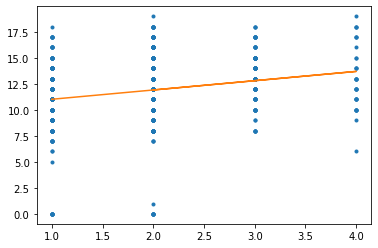

In [9]:
plt.plot(sf['studytime'],sf['G3'],'.', sf['studytime'],linear_model.predict(sf),'-')

In [10]:
linear_model.coefficients

name,index,value,stderr
(intercept),None,10.127706144679204,0.3535407486659204
studytime,None,0.8923905566446915,0.1681207500517519


In [11]:
linear_model.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 2
Number of examples             : 514
Number of feature columns      : 1
Number of unpacked features    : 1

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 1.0042

Settings
--------
Residual sum of squares        : 5243.5423
Training RMSE                  : 3.194

Highest Positive Coefficients
-----------------------------
(intercept)                    : 10.1277
studytime                      : 0.8924

Lowest Negative Coefficients
----------------------------
No Negative Coefficients       : 



In [12]:
p = linear_model.predict(train_data)

In [13]:
p.show()

Materializing SArray

In [14]:
evall = linear_model.evaluate(train_data)
evall

{'max_error': 11.912487257968586, 'rmse': 3.1939699646817026}

In [15]:
sa = tc.SArray(sf["G3"])

In [16]:
sa2 = tc.SArray(sf["studytime"])

In [17]:
heatmap = tc.visualization.heatmap(sa,sa2)
heatmap

In [18]:
targets = test_data["G3"]
predicted = linear_model.predict(test_data)
predicted=predicted.astype(int)
targets = targets.astype(int)

In [19]:
tc.evaluation.rmse(targets,predicted)

3.0086295637468985

# Model 2 with 2 feature

In [20]:
model2=tc.linear_regression.create(train_data,target = "G3",features=["studytime","health"],validation_set=None ,verbose = False)

In [21]:
model2.coefficients

name,index,value,stderr
(intercept),None,10.877415290743377,0.5145726973287067
studytime,None,0.8712595339246563,0.1679629503041011
health,None,-0.19934882798765302,0.09967600796238198


In [22]:
model2.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 3
Number of examples             : 514
Number of feature columns      : 2
Number of unpacked features    : 2

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0047

Settings
--------
Residual sum of squares        : 5202.8071
Training RMSE                  : 3.1815

Highest Positive Coefficients
-----------------------------
(intercept)                    : 10.8774
studytime                      : 0.8713

Lowest Negative Coefficients
----------------------------
health                         : -0.1993



In [23]:
model2.predict(test_data).show()

Materializing SArray

In [24]:
targets = test_data["G3"]
predicted = model2.predict(test_data)
predicted=predicted.astype(int)
targets = targets.astype(int)

In [25]:
tc.evaluation.rmse(targets,predicted)

2.9764507822672392

# Model 3 (with 3 features)

In [26]:
model3=tc.linear_regression.create(train_data,target = "G3",features=["studytime","health","freetime"],validation_set=None ,verbose = False)

In [27]:
model3.coefficients

name,index,value,stderr
(intercept),None,12.049122584621314,0.6613403760802892
studytime,None,0.8473656826358086,0.16707563179225093
health,None,-0.1766289068576118,0.09935309565636452
freetime,None,-0.3788092597750319,0.13565585321276824


In [28]:
model3.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 4
Number of examples             : 514
Number of feature columns      : 3
Number of unpacked features    : 3

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0016

Settings
--------
Residual sum of squares        : 5124.4278
Training RMSE                  : 3.1575

Highest Positive Coefficients
-----------------------------
(intercept)                    : 12.0491
studytime                      : 0.8474

Lowest Negative Coefficients
----------------------------
freetime                       : -0.3788
health                         : -0.1766



In [29]:
targets = test_data["G3"]
predicted = model3.predict(test_data)
predicted=predicted.astype(int)
targets = targets.astype(int)

In [30]:
tc.evaluation.rmse(targets,predicted)

2.9639813064837615

# Model 4 (with 4 features)

In [31]:
model4=tc.linear_regression.create(train_data,target = "G3",features=["studytime","health","freetime","absences"],validation_set=None ,verbose = False)

In [32]:
model4.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 5
Number of examples             : 514
Number of feature columns      : 4
Number of unpacked features    : 4

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0078

Settings
--------
Residual sum of squares        : 5113.148
Training RMSE                  : 3.154

Highest Positive Coefficients
-----------------------------
(intercept)                    : 12.2417
studytime                      : 0.8248

Lowest Negative Coefficients
----------------------------
freetime                       : -0.3824
health                         : -0.183
absences                       : -0.0311



In [33]:
targets = test_data["G3"]
predicted = model4.predict(test_data)
predicted=predicted.astype(int)
targets = targets.astype(int)

In [34]:
tc.evaluation.rmse(targets,predicted)

2.9527137549241913

# Model 5 (with 5 features)

In [35]:
model5=tc.linear_regression.create(train_data,target = "G3",features=["studytime","health","freetime","G1","absences"],validation_set=None ,verbose = False)

In [36]:
model5.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 6
Number of examples             : 514
Number of feature columns      : 5
Number of unpacked features    : 5

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0018

Settings
--------
Residual sum of squares        : 1721.7314
Training RMSE                  : 1.8302

Highest Positive Coefficients
-----------------------------
(intercept)                    : 1.3134
G1                             : 0.9859
studytime                      : 0.1091
absences                       : 0.0219

Lowest Negative Coefficients
----------------------------
freetime                       : -0.1763
health                         : -0.1304



In [37]:
targets = test_data["G3"]
predicted = model5.predict(test_data)
predicted=predicted.astype(int)
targets = targets.astype(int)

In [38]:
tc.evaluation.rmse(targets,predicted)

1.8993176162525864

# Model 6 ( with 6 features)

In [39]:
model6=tc.linear_regression.create(train_data,target = "G3",features=["studytime","health","freetime","G1","G2","absences"],validation_set=None ,verbose = False)

In [40]:
model6.summary()

Class                          : LinearRegression

Schema
------
Number of coefficients         : 7
Number of examples             : 514
Number of feature columns      : 6
Number of unpacked features    : 6

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : newton
Solver iterations              : 1
Solver status                  : SUCCESS: Optimal solution found.
Training time (sec)            : 0.0014

Settings
--------
Residual sum of squares        : 868.282
Training RMSE                  : 1.2997

Highest Positive Coefficients
-----------------------------
G2                             : 0.9004
G1                             : 0.1626
studytime                      : 0.088
absences                       : 0.0278

Lowest Negative Coefficients
----------------------------
(intercept)                    : -0.232
freetime                       : -0.0868
health   

In [41]:
targets = test_data["G3"]
predicted = model6.predict(test_data)
predicted=predicted.astype(int)
targets = targets.astype(int)

In [42]:
tc.evaluation.rmse(targets,predicted)

1.264911064067352

# Best Model

In [43]:
train_data, test_data = sf.random_split(0.8) 
model=tc.regression.create(train_data,target = "G3",
                                features=["studytime","health","freetime","G1","G2","absences"],
                                validation_set=None,verbose=None)
    
targetsf = test_data["G3"]
predictedf = model.predict(test_data)
predictedf=predictedf.astype(int)
targetsf = targetsf.astype(int)
evaluation=tc.evaluation.rmse(targetsf,predictedf)
 

Linear regression:

--------------------------------------------------------

Number of examples          : 514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.001095     | 9.379828           | 1.295446                        |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Boosted trees regression:

--------------------------------------------------------

Number of examples          : 514

Number of features          : 6

Number of unpacked features : 6

+-----------+--------------+--------------------+---------------------------------+

| Iteration | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+--------------+--------------------+---------------------------------+

| 1         | 0.004592     | 13.952101          | 8.339144                        |

| 2         | 0.007986     | 10.591290          | 5.923869                        |

| 3         | 0.010959     | 9.002352           | 4.247464                        |

| 4         | 0.013660     | 7.916821           | 3.086452                        |

| 5         | 0.016421     | 8.082795           | 2.299583                        |

| 10        | 0.034034     | 8.069799           | 0.969029                        |

+-----------+--------------+--------------------+---------------------------------+

In [44]:
evaluation

1.5153535218873175

# Random Forest

In [45]:
best=99
for _ in range(100):
    random_forest = tc.random_forest_regression.create(train_data,target = "G3",
                                features=["studytime","health","freetime","G1","G2","absences"],
                                validation_set=None ,verbose = False)
    targets2 = test_data["G3"]
    predicted2 = random_forest.predict(test_data)
    predicted2=predicted2.astype(int)
    targets2 = targets2.astype(int)
    evaluation=tc.evaluation.rmse(targets2,predicted2)
    if( evaluation<best):
        best=evaluation
        best_random_forest=random_forest

In [46]:
best

1.3416407864998736

# Decision Tree

In [47]:
best=0
for _ in range(100):
    decision_tree= tc.decision_tree_regression.create(train_data,target = "G3",
                                features=["studytime","health","freetime","G1","G2","absences"],
                                validation_set=None ,verbose = False)
    targets2 = test_data["G3"]
    predicted2 = decision_tree.predict(test_data)
    predicted2=predicted2.astype(int)
    targets2 = targets2.astype(int)
    evaluation=tc.evaluation.rmse(targets2,predicted2)
    if(best==0 or evaluation<best):
        best=evaluation
        best_decision_tree=decision_tree
    

In [48]:
best

1.7554149029450223

# Boosted Tree

In [49]:
best1=999
for _ in range(100):
    boosted_trees=tc.boosted_trees_regression.create(train_data,target = "G3",
                                features=["studytime","health","freetime","G1","G2","absences"],
                                validation_set=None ,verbose = False)
    targets2 = test_data["G3"]
    predicted2 = boosted_trees.predict(test_data)
    predicted2=predicted2.astype(int)
    targets2 = targets2.astype(int)
    evaluation=tc.evaluation.rmse(targets2,predicted2)
    if( evaluation<best1):
        best1=evaluation
        best_boosted_tree= boosted_trees

In [50]:
best1

1.5153535218873175

# Linear Regression 

In [51]:
best2=99
for _ in range(100):
    linear = tc.linear_regression.create(train_data,target = "G3",
                                features=["studytime","health","freetime","G1","G2","absences"],
                                validation_set=None ,verbose = False)
    targets2 = test_data["G3"]
    predicted2 = linear.predict(test_data)
    predicted2=predicted2.astype(int)
    targets2.astype(int)
    evaluation=tc.evaluation.rmse(targets2,predicted2)
    if( best2>evaluation):
        best2=evaluation
        best_linear=linear

In [52]:
best2

1.2202003478482086

# Lasso Regularization 

In [53]:
lasso_model=tc.linear_regression.create(train_data,target="G3",features=["studytime","freetime","G2","G1","absences","health"], 
                                        l1_penalty=0,verbose=None,validation_set=None)

In [54]:
lasso_prediction=lasso_model.predict(test_data)
target=test_data["G3"]
evaluation= tc.evaluation.rmse(target,lasso_prediction)
print(evaluation)

1.0586486917265563


# Ridge Regularization

In [55]:
ridge_model=tc.linear_regression.create(train_data,target="G3",features=["studytime","freetime","G2","G1","absences","health"], 
                                        l2_penalty=1.5,verbose=None,validation_set=None)

In [56]:
ridge_prediction=ridge_model.predict(test_data)
target=test_data["G3"]
evaluation= tc.evaluation.rmse(target,ridge_prediction)
print(evaluation)

1.07054437925704


# Elastic Model

In [57]:
elastic_model=tc.linear_regression.create(train_data,target="G3",features=["studytime","freetime","G2","G1","absences","health"], 
                                        l1_penalty=0,l2_penalty=1.5,verbose=None,validation_set=None)

In [58]:
elastic_prediction=elastic_model.predict(test_data)
target=test_data["G3"]
evaluation= tc.evaluation.rmse(target,elastic_prediction)
print(evaluation)

1.07054437925704
